In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Loading data using keras method

Split is 80/20 
80 percent training
20 percent validating

In [3]:
training_dataset = tf.keras.utils.image_dataset_from_directory(
    './model_data/',
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(300,300),
    batch_size=250
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    './model_data/',
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=(300,300),
    batch_size=250
)

Found 10000 files belonging to 2 classes.
Using 8000 files for training.
Found 10000 files belonging to 2 classes.
Using 2000 files for validation.


# Get class names

Should be two: wet and dry

In [4]:
categories = training_dataset.class_names
print(categories)

['dry', 'wet']


# Pre-process data

Normalizing rgb values by adding a rescaling layer

In [4]:
norm_layer = layers.Rescaling(1./255)

# Optimize performance

Pre-fetching for fast training and validation

In [5]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = training_dataset.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = validation_dataset.cache().prefetch(buffer_size=AUTOTUNE)

# Build CNN Model

2 2D Convolutional NN 

2 2D MaxPooling NN

2 classes

In [6]:
num_classes = 2

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [7]:
fitting = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
32/32 [==============================] - 226s 7s/step - loss: 0.6823 - accuracy: 0.5454 - val_loss: 0.6408 - val_accuracy: 0.6520
Epoch 2/10
32/32 [==============================] - 243s 8s/step - loss: 0.6122 - accuracy: 0.6697 - val_loss: 0.5715 - val_accuracy: 0.7055
Epoch 3/10
32/32 [==============================] - 248s 8s/step - loss: 0.5292 - accuracy: 0.7306 - val_loss: 0.5051 - val_accuracy: 0.7500
Epoch 4/10
32/32 [==============================] - 246s 8s/step - loss: 0.4660 - accuracy: 0.7751 - val_loss: 0.4364 - val_accuracy: 0.8130
Epoch 5/10
32/32 [==============================] - 268s 8s/step - loss: 0.3973 - accuracy: 0.8158 - val_loss: 0.3880 - val_accuracy: 0.8160
Epoch 6/10
32/32 [==============================] - 281s 9s/step - loss: 0.3342 - accuracy: 0.8503 - val_loss: 0.3326 - val_accuracy: 0.8645
Epoch 7/10
32/32 [==============================] - 278s 9s/step - loss: 0.2530 - accuracy: 0.8964 - val_loss: 0.3083 - val_accuracy: 0.8840
Epoch 8/10
32

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 300, 300, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 298, 298, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 32)        9

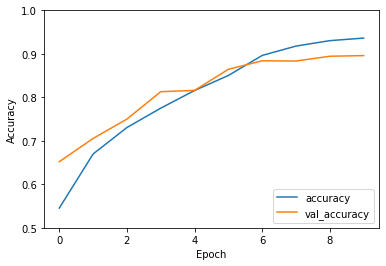

In [9]:
plt.plot(fitting.history['accuracy'], label='accuracy')
plt.plot(fitting.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

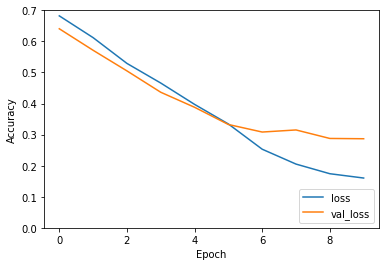

In [10]:
plt.plot(fitting.history['loss'], label='loss')
plt.plot(fitting.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 0.7])
plt.legend(loc='lower right')

In [11]:
model.save('./models/version5/')

INFO:tensorflow:Assets written to: ./models/version5/assets


INFO:tensorflow:Assets written to: ./models/version5/assets
